In [3]:
!pip install -q git+https://github.com/tensorflow/examples.git

  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
import tensorflow_datasets as tfds

import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

tfds.disable_progress_bar()
AUTOTUNE = tf.data.experimental.AUTOTUNE

from tensorflow_examples.models.pix2pix import pix2pix
EPOCHS = 40

In [72]:
dataset, metadata = tfds.load('cycle_gan/horse2zebra',
                              with_info=True, as_supervised=True)

train_horses, train_zebras = dataset['trainA'], dataset['trainB']
test_horses, test_zebras = dataset['testA'], dataset['testB']

In [109]:
builder = tfds.builder('ori', data_dir='../image')

DatasetNotFoundError: Dataset ori not found.
Available datasets:
	- abstract_reasoning
	- accentdb
	- aeslc
	- aflw2k3d
	- ag_news_subset
	- ai2_arc
	- ai2_arc_with_ir
	- amazon_us_reviews
	- anli
	- arc
	- bair_robot_pushing_small
	- bccd
	- beans
	- big_patent
	- bigearthnet
	- billsum
	- binarized_mnist
	- binary_alpha_digits
	- blimp
	- bool_q
	- c4
	- caltech101
	- caltech_birds2010
	- caltech_birds2011
	- cars196
	- cassava
	- cats_vs_dogs
	- celeb_a
	- celeb_a_hq
	- cfq
	- cherry_blossoms
	- chexpert
	- cifar10
	- cifar100
	- cifar10_1
	- cifar10_corrupted
	- citrus_leaves
	- cityscapes
	- civil_comments
	- clevr
	- clic
	- clinc_oos
	- cmaterdb
	- cnn_dailymail
	- coco
	- coco_captions
	- coil100
	- colorectal_histology
	- colorectal_histology_large
	- common_voice
	- coqa
	- cos_e
	- cosmos_qa
	- covid19sum
	- crema_d
	- curated_breast_imaging_ddsm
	- cycle_gan
	- d4rl_mujoco_ant
	- d4rl_mujoco_halfcheetah
	- dart
	- davis
	- deep_weeds
	- definite_pronoun_resolution
	- dementiabank
	- diabetic_retinopathy_detection
	- div2k
	- dmlab
	- dolphin_number_word
	- downsampled_imagenet
	- drop
	- dsprites
	- dtd
	- duke_ultrasound
	- e2e_cleaned
	- efron_morris75
	- emnist
	- eraser_multi_rc
	- esnli
	- eurosat
	- fashion_mnist
	- flic
	- flores
	- food101
	- forest_fires
	- fuss
	- gap
	- geirhos_conflict_stimuli
	- gem
	- genomics_ood
	- german_credit_numeric
	- gigaword
	- glue
	- goemotions
	- gpt3
	- gref
	- groove
	- gtzan
	- gtzan_music_speech
	- hellaswag
	- higgs
	- horses_or_humans
	- howell
	- i_naturalist2017
	- imagenet2012
	- imagenet2012_corrupted
	- imagenet2012_real
	- imagenet2012_subset
	- imagenet_a
	- imagenet_r
	- imagenet_resized
	- imagenet_v2
	- imagenette
	- imagewang
	- imdb_reviews
	- irc_disentanglement
	- iris
	- kitti
	- kmnist
	- lambada
	- lfw
	- librispeech
	- librispeech_lm
	- libritts
	- ljspeech
	- lm1b
	- lost_and_found
	- lsun
	- lvis
	- malaria
	- math_dataset
	- mctaco
	- mlqa
	- mnist
	- mnist_corrupted
	- movie_lens
	- movie_rationales
	- movielens
	- moving_mnist
	- multi_news
	- multi_nli
	- multi_nli_mismatch
	- natural_questions
	- natural_questions_open
	- newsroom
	- nsynth
	- nyu_depth_v2
	- ogbg_molpcba
	- omniglot
	- open_images_challenge2019_detection
	- open_images_v4
	- openbookqa
	- opinion_abstracts
	- opinosis
	- opus
	- oxford_flowers102
	- oxford_iiit_pet
	- para_crawl
	- patch_camelyon
	- paws_wiki
	- paws_x_wiki
	- pet_finder
	- pg19
	- piqa
	- places365_small
	- plant_leaves
	- plant_village
	- plantae_k
	- qa4mre
	- qasc
	- quac
	- quickdraw_bitmap
	- race
	- radon
	- reddit
	- reddit_disentanglement
	- reddit_tifu
	- resisc45
	- robonet
	- rock_paper_scissors
	- rock_you
	- s3o4d
	- salient_span_wikipedia
	- samsum
	- savee
	- scan
	- scene_parse150
	- schema_guided_dialogue
	- scicite
	- scientific_papers
	- sentiment140
	- shapes3d
	- siscore
	- smallnorb
	- snli
	- so2sat
	- speech_commands
	- spoken_digit
	- squad
	- stanford_dogs
	- stanford_online_products
	- star_cfq
	- starcraft_video
	- stl10
	- story_cloze
	- sun397
	- super_glue
	- svhn_cropped
	- tao
	- ted_hrlr_translate
	- ted_multi_translate
	- tedlium
	- tf_flowers
	- the300w_lp
	- tiny_shakespeare
	- titanic
	- trec
	- trivia_qa
	- tydi_qa
	- uc_merced
	- ucf101
	- vctk
	- vgg_face2
	- visual_domain_decathlon
	- voc
	- voxceleb
	- voxforge
	- waymo_open_dataset
	- web_nlg
	- web_questions
	- wider_face
	- wiki40b
	- wiki_bio
	- wiki_table_questions
	- wiki_table_text
	- wikiann
	- wikihow
	- wikipedia
	- wikipedia_toxicity_subtypes
	- wine_quality
	- winogrande
	- wmt13_translate
	- wmt14_translate
	- wmt15_translate
	- wmt16_translate
	- wmt17_translate
	- wmt18_translate
	- wmt19_translate
	- wmt_t2t_translate
	- wmt_translate
	- wordnet
	- wsc273
	- xnli
	- xquad
	- xsum
	- xtreme_pawsx
	- xtreme_xnli
	- yelp_polarity_reviews
	- yes_no
	- youtube_vis

Check that:
    - if dataset was added recently, it may only be available
      in `tfds-nightly`
    - the dataset name is spelled correctly
    - dataset class defines all base class abstract methods
    - the module defining the dataset class is imported


In [73]:
dataset

{'trainA': <PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>,
 'trainB': <PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>,
 'testA': <PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>,
 'testB': <PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>}

In [88]:
dataset['trainA']

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [27]:
train_horses

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
PATH = os.path.join(os.path.dirname('../images/pixel_art'), )

PATH

'../images'

In [5]:
real_image = os.path.join(PATH, 'real_images')
pixel_image = os.path.join(PATH, 'pixel_art')

In [6]:
num_real = len(os.listdir(real_image))
num_pixel = len(os.listdir(pixel_image))

In [7]:
num_real

139

In [8]:
num_pixel

140

In [28]:
PATH

'../images'

tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_path='../images',
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'origin': <SplitInfo num_examples=279, num_shards=1>,
    },
    citation="""""",
)


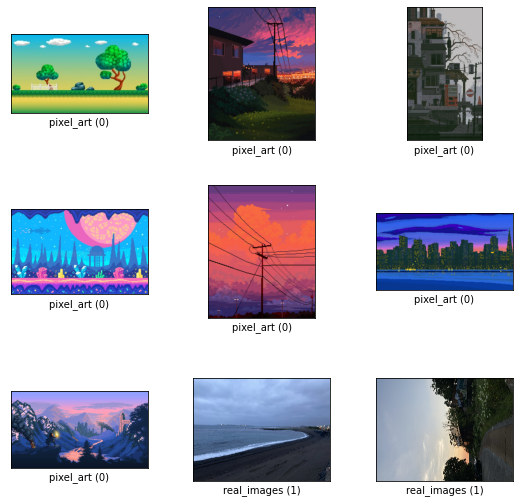

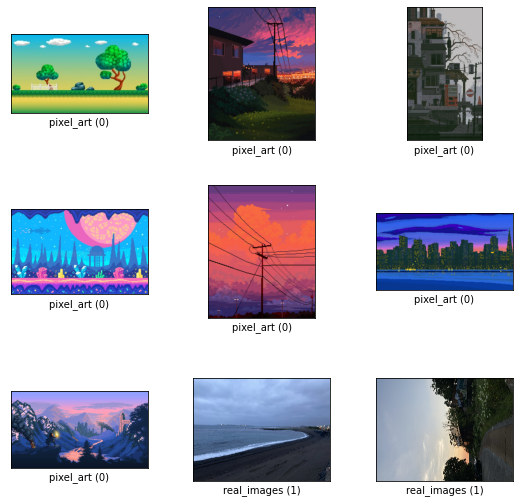

In [65]:
builder = tfds.ImageFolder('../images')
print(builder.info)  # num examples, labels... are automatically calculated
ds = builder.as_dataset(split='origin', shuffle_files=True)
tfds.show_examples(ds, builder.info)

In [105]:
ds

<_OptionsDataset shapes: {image: (None, None, 3), image/filename: (), label: ()}, types: {image: tf.uint8, image/filename: tf.string, label: tf.int64}>

In [108]:
tfds.builder_from_directories('../images')

AttributeError: module 'tensorflow_datasets' has no attribute 'builder_from_directories'

In [97]:

a["image"]

TypeError: 'TakeDataset' object is not subscriptable

In [95]:
a[0]

TypeError: 'TakeDataset' object is not subscriptable

In [79]:
new_ds

<PrefetchDataset shapes: {image: (None, None, 3), image/filename: (), label: ()}, types: {image: tf.uint8, image/filename: tf.string, label: tf.int64}>

In [57]:
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [18]:
train_image_generator = ImageDataGenerator(rescale=1./127.5 -1)
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=PATH,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                            class_mode='binary'
                                                          )


Found 279 images belonging to 2 classes.


In [59]:
def random_crop(image):
    cropped_image = tf.image.random_crop(
        image, size=[IMG_HEIGHT, IMG_WIDTH, 3])

    return cropped_image

In [60]:
# normalizing the images to [-1, 1]
def normalize(image):
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    return image

In [61]:
def random_jitter(image):
    # resizing to 286 x 286 x 3
    image = tf.image.resize(image, [286, 286],
                            method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

    # randomly cropping to 256 x 256 x 3
    image = random_crop(image)

    # random mirroring
    image = tf.image.random_flip_left_right(image)

    return image

In [62]:
def preprocess_image_train(image, label):
    image = random_jitter(image)
    image = normalize(image)
    return image

In [63]:
def preprocess_image_test(image, label):
    image = normalize(image)
    return image

In [80]:
new_ds.map(preprocess_image_train, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

TypeError: in user code:


    TypeError: tf__preprocess_image_train() missing 1 required positional argument: 'label'


In [11]:
train_horses = train_horses.map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

train_zebras = train_zebras.map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

test_horses = test_horses.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

test_zebras = test_zebras.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

In [50]:
train_horses

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [51]:
test_horses

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [76]:
sample_horse = next(iter(train_horses))
sample_zebra = next(iter(train_zebras))

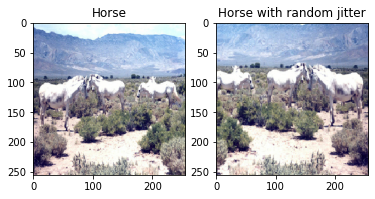

In [77]:
plt.subplot(121)
plt.title('Horse')
plt.imshow(sample_horse[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Horse with random jitter')
plt.imshow(random_jitter(sample_horse[0]) * 0.5 + 0.5)

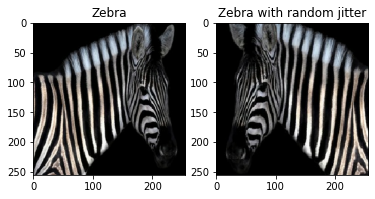

In [78]:
plt.subplot(121)
plt.title('Zebra')
plt.imshow(sample_zebra[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Zebra with random jitter')
plt.imshow(random_jitter(sample_zebra[0]) * 0.5 + 0.5)

In [9]:
OUTPUT_CHANNELS = 3

generator_g = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')
generator_f = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')

discriminator_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
discriminator_y = pix2pix.discriminator(norm_type='instancenorm', target=False)

In [80]:
sample_zebra.shape

TensorShape([1, 256, 256, 3])

In [1]:
sample_zebra

NameError: name 'sample_zebra' is not defined

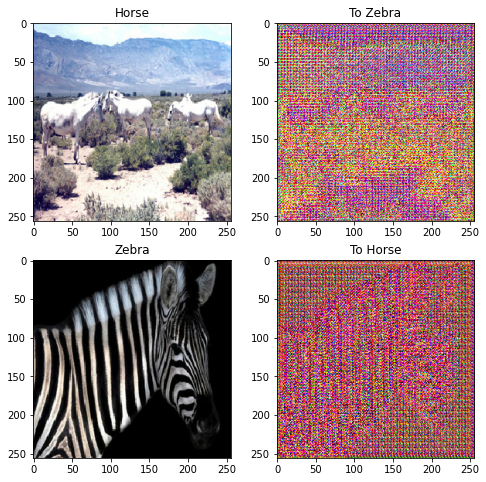

In [81]:
to_zebra = generator_g(sample_horse)
to_horse = generator_f(sample_zebra)
plt.figure(figsize=(8, 8))
contrast = 8

imgs = [sample_horse, to_zebra, sample_zebra, to_horse]
title = ['Horse', 'To Zebra', 'Zebra', 'To Horse']

for i in range(len(imgs)):
    plt.subplot(2, 2, i+1)
    plt.title(title[i])
    if i % 2 == 0:
        plt.imshow(imgs[i][0] * 0.5 + 0.5)
    else:
        plt.imshow(imgs[i][0] * 0.5 * contrast + 0.5)
plt.show()

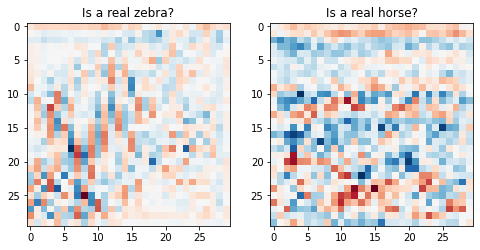

In [82]:
plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.title('Is a real zebra?')
plt.imshow(discriminator_y(sample_zebra)[0, ..., -1], cmap='RdBu_r')

plt.subplot(122)
plt.title('Is a real horse?')
plt.imshow(discriminator_x(sample_horse)[0, ..., -1], cmap='RdBu_r')

plt.show()

In [10]:
LAMBDA = 10

loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)


In [11]:
def discriminator_loss(real, generated):
    real_loss = loss_obj(tf.ones_like(real), real)

    generated_loss = loss_obj(tf.zeros_like(generated), generated)

    total_disc_loss = real_loss + generated_loss

    return total_disc_loss * 0.5

In [12]:
def generator_loss(generated):
    return loss_obj(tf.ones_like(generated), generated)

In [13]:
def calc_cycle_loss(real_image, cycled_image):
    loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))

    return LAMBDA * loss1

In [14]:
def identity_loss(real_image, same_image):
    loss = tf.reduce_mean(tf.abs(real_image - same_image))
    return LAMBDA * 0.5 * loss

In [15]:
generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [16]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

Latest checkpoint restored!!


In [79]:
def generate_images(model, test_input):
    prediction = model(test_input)

    plt.figure(figsize=(12, 12))

    display_list = [test_input[0], prediction[0]]
    title = ['Input Image', 'Predicted Image']

    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        # getting the pixel values between [0, 1] to plot it.
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.show()

In [80]:
@tf.function
def train_step(real_x, real_y):
  # persistent is set to True because the tape is used more than
  # once to calculate the gradients.
    with tf.GradientTape(persistent=True) as tape:
        # Generator G translates X -> Y
        # Generator F translates Y -> X.

        fake_y = generator_g(real_x, training=True)
        cycled_x = generator_f(fake_y, training=True)

        fake_x = generator_f(real_y, training=True)
        cycled_y = generator_g(fake_x, training=True)

        # same_x and same_y are used for identity loss.
        same_x = generator_f(real_x, training=True)
        same_y = generator_g(real_y, training=True)

        disc_real_x = discriminator_x(real_x, training=True)
        disc_real_y = discriminator_y(real_y, training=True)

        disc_fake_x = discriminator_x(fake_x, training=True)
        disc_fake_y = discriminator_y(fake_y, training=True)

        # calculate the loss
        gen_g_loss = generator_loss(disc_fake_y)
        gen_f_loss = generator_loss(disc_fake_x)

        total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)

        # Total generator loss = adversarial loss + cycle loss
        total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
        total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)

        disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
        disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)

    # Calculate the gradients for generator and discriminator
    generator_g_gradients = tape.gradient(total_gen_g_loss, 
                                        generator_g.trainable_variables)
    generator_f_gradients = tape.gradient(total_gen_f_loss, 
                                        generator_f.trainable_variables)

    discriminator_x_gradients = tape.gradient(disc_x_loss, 
                                            discriminator_x.trainable_variables)
    discriminator_y_gradients = tape.gradient(disc_y_loss, 
                                            discriminator_y.trainable_variables)

    # Apply the gradients to the optimizer
    generator_g_optimizer.apply_gradients(zip(generator_g_gradients, 
                                            generator_g.trainable_variables))

    generator_f_optimizer.apply_gradients(zip(generator_f_gradients, 
                                            generator_f.trainable_variables))

    discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients,
                                                discriminator_x.trainable_variables))

    discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients,
                                                discriminator_y.trainable_variables))

In [ ]:
for epoch in range(EPOCHS):
    start = time.time()

    n = 0
    for image_x, image_y in tf.data.Dataset.zip((train_horses, train_zebras)):
        train_step(image_x, image_y)
        if n % 10 == 0:
            print ('.', end='')
        n+=10

    clear_output(wait=True)
    # Using a consistent image (sample_horse) so that the progress of the model
    # is clearly visible.
    generate_images(generator_g, sample_horse)

    if (epoch + 1) % 50 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                     ckpt_save_path))

        print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                  time.time()-start))

In [81]:
sample_horse_ = tf.reshape(sample_horse, [-1, 1, 256, 256, 3])
sample_zebra_ = tf.reshape(sample_zebra, [-1, 1, 256, 256, 3])

NameError: name 'sample_horse' is not defined

In [82]:
horse = tf.data.Dataset.from_tensor_slices(sample_horse_)
zebra = tf.data.Dataset.from_tensor_slices(sample_zebra_)


NameError: name 'sample_horse_' is not defined

In [83]:
for a, b in tf.data.Dataset.zip((train_horses, train_zebras)):
    print('a : ', a.shape)
    print(a)
    print('b : ', b.shape)

NameError: name 'train_horses' is not defined

In [84]:
import PIL
import numpy as np
an_image = PIL.Image.open('../images/허경영2.png')
an_image2 = PIL.Image.open('../images/훠궝영2.png')

In [85]:
ori_arr = np.array(an_image)[-256:, :256, :3]
target_arr = np.array(an_image2)[-256:, :256, :3]

In [86]:
def normalize(image):
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    return image

In [87]:
ori_image = normalize(ori_arr)
target_image = normalize(target_arr)

In [88]:
ori_image = tf.reshape(ori_image, [-1, 1, 256, 256, 3])
target_image = tf.reshape(target_image, [-1, 1, 256, 256, 3])

In [89]:
horse = tf.data.Dataset.from_tensor_slices(ori_image)
zebra = tf.data.Dataset.from_tensor_slices(target_image)

In [91]:
for h in horse:
    print('-')

-


In [1]:
# for epoch in range(100):
#     start = time.time()

#     n = 0
#     for image_x, image_y in zip(horse, zebra):
#         train_step(image_x, image_y)
#         if n % 10 == 0:
#             print ('.', end='')
#         n+=1

#     clear_output(wait=True)
#       # Using a consistent image (sample_horse) so that the progress of the model
#       # is clearly visible.
#     generate_images(generator_g, h)

#     if (epoch + 1) % 5 == 0:
#         ckpt_save_path = ckpt_manager.save()
#         print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
#                                                          ckpt_save_path))

#     print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
#                                                       time.time()-start))

In [2]:
# an_image

In [3]:
# an_image2